In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [2]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    return np.linalg.solve((tx.T @ tx), (tx.T @ y))


### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [3]:
from helpers import *
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    w = least_squares(y, tx)
    return w

Test it here

In [4]:
test_your_least_squares()

array([73.293922  , 13.47971243])

## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [5]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [6]:
from costs import compute_mse
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)
    
    for ind, degree in enumerate(degrees):
        X_p = build_poly(x, degree)
        w = least_squares(y, X_p)
        rmse = compute_mse(y, X_p, w)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.1113335172654798
Processing 2th experiment, degree=3, rmse=0.03343252619709059
Processing 3th experiment, degree=7, rmse=0.031164734143881594
Processing 4th experiment, degree=12, rmse=0.02961502563538239


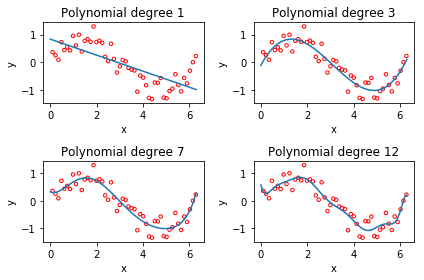

In [7]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [8]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    indexes = np.arange(x.shape[0])
    np.random.shuffle(indexes)
    val = int(x.shape[0] * ratio)
    return (x[indexes[:val]],y[indexes[:val]]), (x[indexes[val:]], y[indexes[val:]])

Then, test your `split_data` function below.

In [9]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    train, test = split_data(x,y,ratio,seed)
    x_train, y_train = train
    x_test, y_test = test
    X_train = build_poly(x_train,degree)
    X_test = build_poly(x_test,degree)
    w = least_squares(tx=X_train, y=y_train)
    rmse_tr = compute_mse(tx=X_train,w=w,y=y_train)
    rmse_te = compute_mse(tx=X_test,w=w,y=y_test)
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [10]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    print("Split ration: {}".format(split_ratio))
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

Split ration: 0.9
proportion=0.9, degree=1, Training RMSE=0.122, Testing RMSE=0.016
proportion=0.9, degree=3, Training RMSE=0.035, Testing RMSE=0.021
proportion=0.9, degree=7, Training RMSE=0.032, Testing RMSE=0.024
proportion=0.9, degree=12, Training RMSE=0.029, Testing RMSE=0.032
Split ration: 0.5
proportion=0.5, degree=1, Training RMSE=0.103, Testing RMSE=0.141
proportion=0.5, degree=3, Training RMSE=0.028, Testing RMSE=0.044
proportion=0.5, degree=7, Training RMSE=0.027, Testing RMSE=0.040
proportion=0.5, degree=12, Training RMSE=0.021, Testing RMSE=1.173
Split ration: 0.1
proportion=0.1, degree=1, Training RMSE=0.091, Testing RMSE=0.143
proportion=0.1, degree=3, Training RMSE=0.004, Testing RMSE=0.106
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=1.981
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.238


# 3 Ridge Regression
Please fill in the function below.

In [29]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    return np.linalg.solve((tx.T @ tx + 2 * tx.shape[0] * lambda_ * np.eye(tx.shape[1])), (tx.T @ y))

In [30]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    train, test = split_data(x,y,ratio,seed)
    x_train, y_train = train
    x_test, y_test = test
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        w = ridge_regression(y_train, x_train, lambda_)
        rmse_tr.append(compute_mse(y_train, x_train, w))
        rmse_te.append(compute_mse(y_test, x_test, w))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)


proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.056
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.056
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.026, Testing RMSE=0.055
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.026, Testing RMSE=0.054
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.027, Testing RMSE=0.051
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.027, Testing RMSE=0.046
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.028, Testing RMSE=0.040
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.030, Testing RMSE=0.038
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.035, Testing RMSE=0.044
proportion=0.5, degree=7, lambda=0.193, 

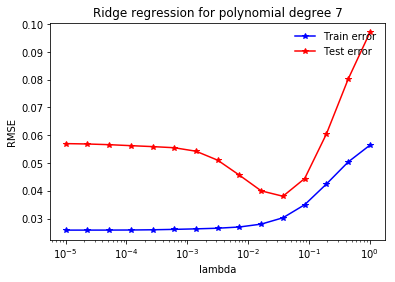

In [31]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)